# Ch1. 클러스터링 분석

- 클러스터링 (군집화) : 유사한 데이터들을 같은 클러스터 (군집) 로 묶어 주는 작업

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

In [ ]:
user_activity = pd.read_csv('app_users.csv', index_col=0)

In [ ]:
user_activity.head()

,visit_per_month,use_time
0,14,22.8
1,32,13.6
2,8,3.1
3,13,5.7
4,19,20.8


모바일 어플리케이션 유저 500명의 월 방문 횟수 (visit_per_month) 와 사용 시간 (use_time) 에 대한 데이터

In [ ]:
user_activity.shape

(500, 2)

<ipython-input-5-fea3cd035449>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, s=100, palette='bright')


<Axes: xlabel='visit_per_month', ylabel='use_time'>

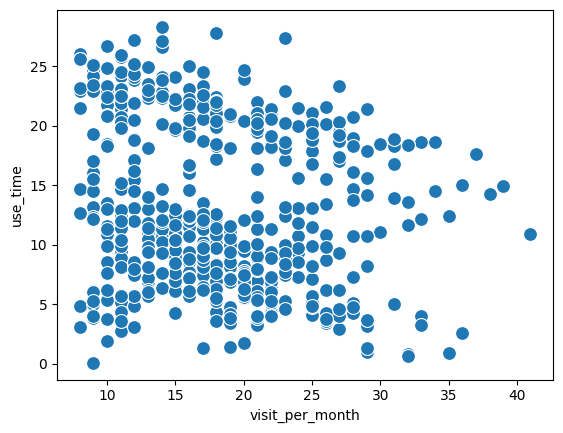

In [ ]:
# 시각화
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, s=100, palette='bright')

In [ ]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

In [ ]:
# 모델링 및 학습
model = KMeans(n_clusters=3, random_state=123)
model.fit(user_activity)

KMeans(n_clusters=3, random_state=123)

In [ ]:
# 클러스터 구분
user_activity['label'] = model.predict(user_activity)

In [ ]:
user_activity.head()

,visit_per_month,use_time,label
0,14,22.8,2
1,32,13.6,1
2,8,3.1,0
3,13,5.7,0
4,19,20.8,2


In [ ]:
# 클러스터별 속한 유저 수
user_activity.groupby('label').count()

,visit_per_month,use_time
label,,
0,229,229
1,121,121
2,150,150


<Axes: xlabel='visit_per_month', ylabel='use_time'>

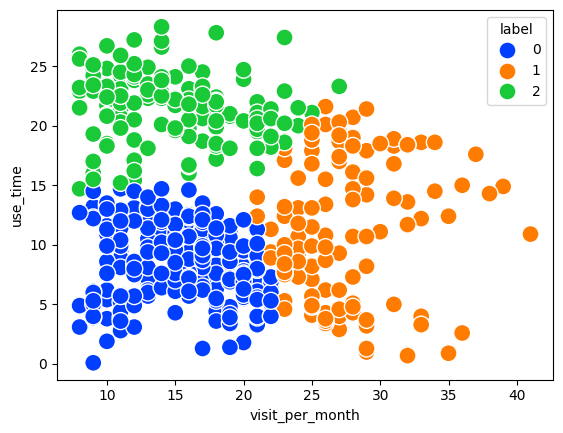

In [ ]:
# 시각화
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, hue=user_activity['label'], s=150, palette='bright')

## 클러스터링의 원리

- 유사한 데이터는 같은 클러스터로 묶는다
- 유사하지 않은 데이터는 다른 클러스터로 묶는다
- 유사한 데이터 = 거리가 가까운 데이터가 유사하다
- 거리가 가까운 데이터는 같은 클러스터로 묶고, 거리가 먼 데이터는 다른 클러스터로 묶는다

## 데이터 전처리

In [ ]:
# 데이터 불러오기
sales_df = pd.read_csv('sales_data.csv', index_col='customer_id')

고객 254명의 상품 구매와 관련된 데이터

In [ ]:
sales_df.head()

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12433,625,1180950
12471,10,97750


In [ ]:
sales_df.shape

(254, 2)

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

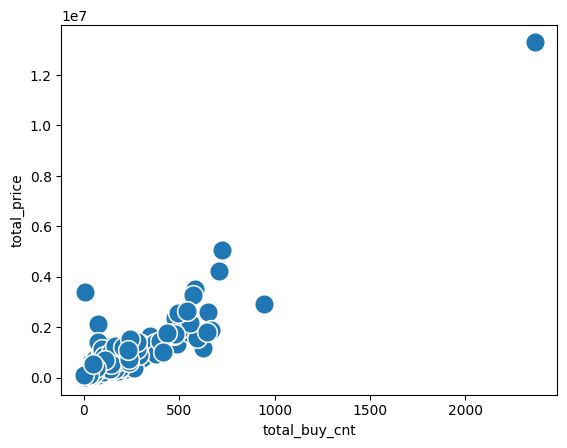

In [ ]:
# 데이터 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

### IQR을 바탕으로 한 이상치 처리

1) IQR (Interquartile Range) = Q3 - Q1

2) 1.5 * IQR

3) lower_limit = Q1 - 1.5 X IQR, upper_limit = Q3 + 1.5 X IQR

In [ ]:
def get_outlier_mask(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    outlier_per_columns = (df < lower_limit) | (df > upper_limit)
    is_outlier = outlier_per_columns.any(axis=1)
    return is_outlier

In [ ]:
outlier_idx_df = get_outlier_mask(sales_df)

In [ ]:
# 이상치가 제거된 데이터 프레임 가져오기
sales_df = sales_df[~outlier_idx_df]

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

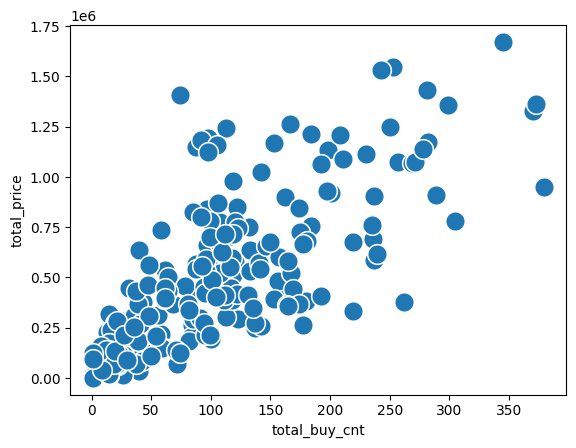

In [ ]:
# 이상치가 제거된 데이터 프레임 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

### 데이터 표준화

- 평균이 0, 표준편차가 1인 데이터로 스케일링
- (데이터 - 평균) / 표준편차

In [ ]:
sales_df.head()

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12471,10,97750
12472,88,568740


In [ ]:
df_mean = sales_df.mean()
df_std = sales_df.std()

In [ ]:
df_mean

,0
total_buy_cnt,103.382222
total_price,487954.400000


In [ ]:
df_std

,0
total_buy_cnt,82.544553
total_price,380912.515536


In [ ]:
# 표준화
scaled_df = (sales_df - df_mean) / df_std

In [ ]:
scaled_df.head()

,total_buy_cnt,total_price
customer_id,,
12395,-0.053089,-0.151490
12427,-0.065204,0.205968
12431,0.225548,0.950207
12471,-1.131295,-1.024394
12472,-0.186351,0.212084


# Ch2. k-means

In [ ]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

In [ ]:
# K-means (k=2)
model = KMeans(n_clusters=2, random_state=123)

In [ ]:
# 모델 학습
model.fit(scaled_df)

KMeans(n_clusters=2, random_state=123)

In [ ]:
# label 컬럼 생성
scaled_df['label'] = model.predict(scaled_df)
scaled_df

,total_buy_cnt,total_price,label
customer_id,,,
12395,-0.053089,-0.151490,0
12427,-0.065204,0.205968,0
12431,0.225548,0.950207,1
12471,-1.131295,-1.024394,0
12472,-0.186351,0.212084,0
...,...,...,...
18144,-0.889001,-1.042771,0
18168,1.691423,2.744923,1
18225,-1.240327,-1.040985,0


In [ ]:
# 각 군집의 중심점 (centroid)
centers = model.cluster_centers_

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

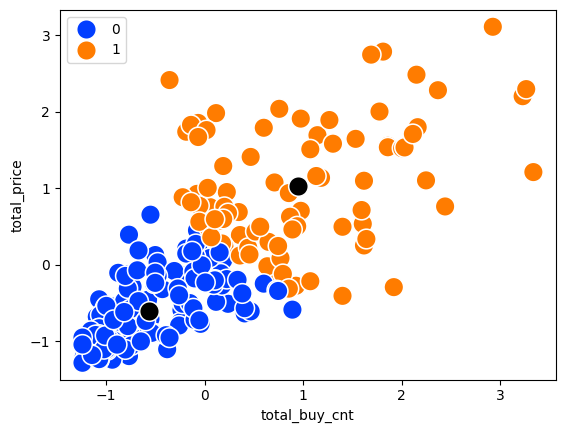

In [ ]:
# 시각화
sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], hue=scaled_df['label'], s=200, palette='bright')
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=200)

## Elbow Method

클러스터의 개수인 k를 정할 때 사용

### k 선정이 중요한 이유

1. k-means의 성능은 클러스터의 개수 k에 따라 달라진다.
2. 클러스터의 개수가 너무 많으면 클러스터링을 하는 의미가 사라진다.
3. 유사한 데이터들을 묶어서 클러스터별 특성을 확인해야 하는데, k가 너무 많으면 그런 특성들이 잘 나타나지 않는다.

### 최적의 k 선정 기준

- 클러스터마다 속한 데이터와 centroid 사이의 거리의 합이 작아야 잘 된 클러스터링
- inertia (이너시아) : 각 클러스터에 속한 데이터들과 centroid 사이의 거리를 제곱해서 전부 합한 값
  - inertia를 계산할 때 제곱을 하는 이유는 제곱을 함으로써 멀리 떨어진 데이터 포인트가 클러스터에 미치는 영향을 더 크게 반영할 수 있고, 이는 클러스터의 품질을 높이기 위해 큰 오류를 더 강조하는 효과가 있음

In [ ]:
model.inertia_

187.06526917589176

In [ ]:
# scaled_df에 추가했던 label열 제거
scaled_df = scaled_df.drop(['label'], axis=1)
scaled_df.head()

,total_buy_cnt,total_price
customer_id,,
12395,-0.053089,-0.151490
12427,-0.065204,0.205968
12431,0.225548,0.950207
12471,-1.131295,-1.024394
12472,-0.186351,0.212084


클러스터의 개수 k를 1부터 15까지로 다르게 하여 각각의 inertia 값을 계산

In [ ]:
# inertia 값을 저장할 리스트
inertias = []

for k in range(1, 16):  # k값의 범위를 1~15로 지정
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

<Axes: >

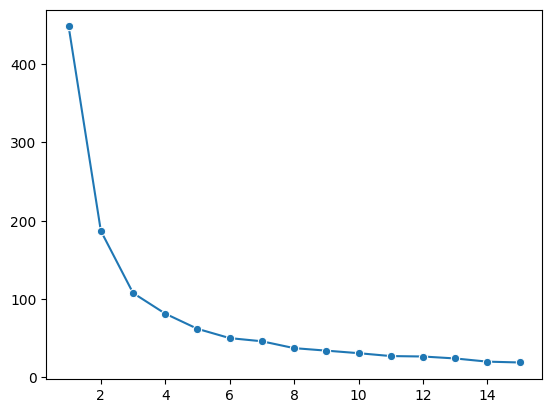

In [ ]:
# k값에 따른 inertia값 시각화
sns.lineplot(x=range(1, 16), y=inertias, marker='o')

1. 클러스터의 개수 k가 커질수록 inertia는 계속 작아진다.
2. 클러스터의 개수가 많아질수록 클러스터링을 하는 의미가 사라진다.
3. 최적의 클러스터 개수는 inertia가 충분히 작지만, 분석 목적에 부합하도록 적당해야 한다.
4. Elbow Plot을 바탕으로 클러스터의 개수 k는 기울기가 급격하게 줄어드는 구간을 파악한다.

### 결과 해석하기

In [ ]:
scaled_df.head()

,total_buy_cnt,total_price
customer_id,,
12395,-0.053089,-0.151490
12427,-0.065204,0.205968
12431,0.225548,0.950207
12471,-1.131295,-1.024394
12472,-0.186351,0.212084


In [ ]:
model = KMeans(n_clusters=5, random_state=123)
model.fit(scaled_df)

KMeans(n_clusters=5, random_state=123)

1. scaled_df (스케일링된 데이터) 를 바탕으로는 클러스터링까지만 진행하고
2. 실제 분석은 데이터의 특성이 그대로 남아있는 sales_df 사용

In [ ]:
sales_df['label'] = model.predict(scaled_df)

In [ ]:
sales_df.head()

,total_buy_cnt,total_price,label
customer_id,,,
12395,99,430250,2
12427,98,566410,2
12431,122,849900,4
12471,10,97750,0
12472,88,568740,2


<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

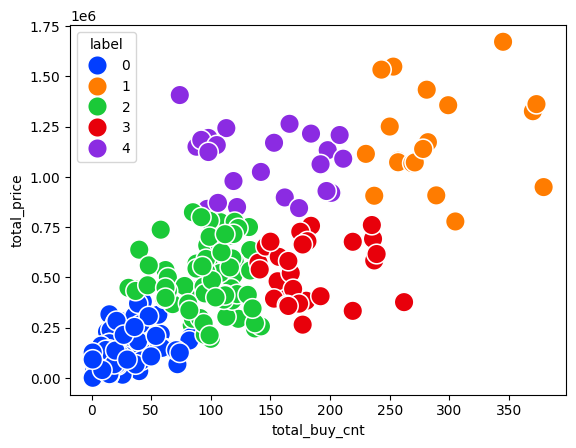

In [ ]:
# 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], hue=sales_df['label'], s=200, palette='bright')

In [ ]:
sales_df['label'].value_counts()

,count
label,
0,81
2,74
3,28
4,23
1,19


In [ ]:
groupby_df = sales_df.groupby('label').mean()
groupby_df

,total_buy_cnt,total_price
label,,
0,27.629630,1.342580e+05
1,287.789474,1.197028e+06
2,96.418919,4.930930e+05
3,182.857143,5.329443e+05
4,143.478261,1.076521e+06


In [ ]:
groupby_df['price_mean'] = groupby_df['total_price'] / groupby_df['total_buy_cnt']
groupby_df

,total_buy_cnt,total_price,price_mean
label,,,
0,27.629630,1.342580e+05,4859.204647
1,287.789474,1.197028e+06,4159.387345
2,96.418919,4.930930e+05,5114.068676
3,182.857143,5.329443e+05,2914.539062
4,143.478261,1.076521e+06,7503.027273


**클러스터 1 (label : 1)**

- 클러스터 1의 고객들은 총 구매 수량과 구매 금액이 가장 많다. 하지만, 개당 구매 가격은 적은 편이다.
- 즉, 클러스터 1의 고객들은 가격이 낮은 물품을 많이 구매한다는 특징이 있는 것으로 해석 가능

**클러스터 4 (label : 4)**

- 클러스터 4의 고객들은 총 구매 수량이 많은 편은 아니지만, 구매한 품목의 평균 금액은 높은 편이다.
- 즉, 클러스터 4의 고객들은 수량은 많지 않지만 비싼 물품을 구매하는 고객들이라고 해석 가능

**결론**

- 이 결과를 바탕으로 프로모션을 진행한다면 고객 클러스터별 특징에 따라 맞춤 전략을 짤 수 있다.
- 저렴한 물품을 여러 번 구매하면 사은품을 주는 프로모션은 클러스터 1의 고객들에게,
- 가격이 높은 제품의 할인 프로모션은 클러스터 4의 고객들에게 진행하면 효과가 더 좋을 것

# Ch3. 다양한 클러스터링 모델들

- 거리 기반 클러스터링 : k-means
- 계층 기반 클러스터링 : 계층형 군집 모델
- 밀도 기반 클러스터링 : DBSCAN
- 분포 기반 클러스터링 : GMM

## 계층형 군집 모델

- 덴드로그램 (dendrogram) : 모든 클러스터의 계층이 구분되어 연결된 상태의 그래프

In [ ]:
# 라이브러리 불러오기
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

In [ ]:
scaled_df.head()

,total_buy_cnt,total_price
customer_id,,
12395,-0.053089,-0.151490
12427,-0.065204,0.205968
12431,0.225548,0.950207
12471,-1.131295,-1.024394
12472,-0.186351,0.212084


In [ ]:
# 유사성 계산 : Ward Method
model = linkage(scaled_df, 'ward')

In [ ]:
labelList = scaled_df.index

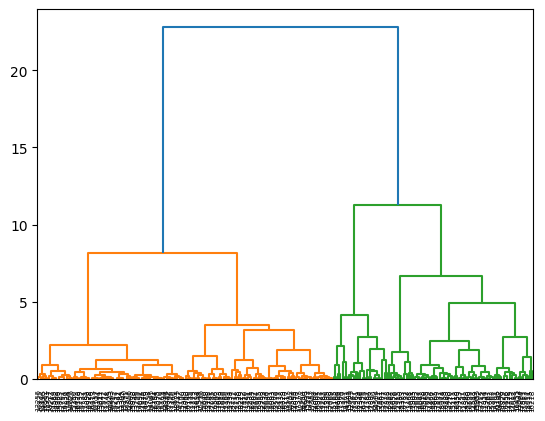

In [ ]:
# 덴드로그램 시각화
dendrogram(model, labels=labelList)
plt.show()

In [ ]:
cluster_num = 5

# 고객별 클러스터 라벨 구하기
scaled_df['label'] = cut_tree(model, cluster_num)
scaled_df.head()

,total_buy_cnt,total_price,label
customer_id,,,
12395,-0.053089,-0.151490,0
12427,-0.065204,0.205968,0
12431,0.225548,0.950207,1
12471,-1.131295,-1.024394,2
12472,-0.186351,0.212084,0


In [ ]:
scaled_df['label'].value_counts()

,count
label,
0,67
2,67
1,54
3,25
4,12


<Axes: xlabel='total_price', ylabel='total_buy_cnt'>

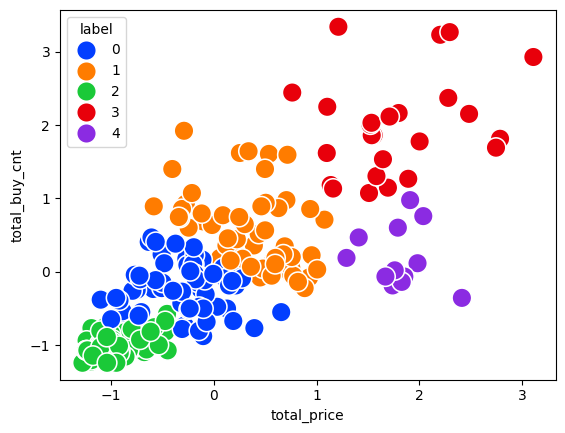

In [ ]:
# 시각화
sns.scatterplot(x=scaled_df['total_price'], y=scaled_df['total_buy_cnt'], hue=scaled_df['label'], s=200, palette='bright')

## DBSCAN

- 밀도 기반 클러스터링 방법으로 반경과 최소 데이터 개수를 정해야 한다.
- DBSCAN은 데이터의 밀도에 따라 클러스터를 생성하기 때문에 복잡하거나 기하학적인 형태를 가진 데이터 세트에 효과적

1. 반경 : 얼마나 가까운 위치에 데이터가 있어야 하는지 나타냄
2. 최소 데이터 개수 : 반경 내에 얼마나 많은 데이터가 있어야 하는지를 나타냄

In [ ]:
# 라이브러리 불러오기
from sklearn.datasets import make_moons
import numpy as np

In [ ]:
n_samples = 1000
np.random.seed(3)
X, y = make_moons(n_samples=n_samples, noise=0.05)  # noise (잡음) : noise가 0이면 정확한 반원을 이룸
df = pd.DataFrame(X)

In [ ]:
df.head()

,0,1
0,0.418668,-0.303678
1,1.054227,-0.443849
2,1.851153,0.081618
3,0.353825,0.914599
4,0.144472,-0.033702


<Axes: xlabel='0', ylabel='1'>

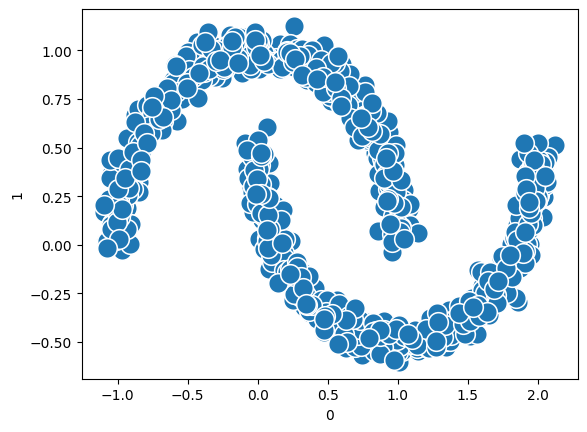

In [ ]:
# 시각화
sns.scatterplot(x=df[0], y=df[1], s=200)

In [ ]:
# k-means 클러스터링
model = KMeans(n_clusters=2, random_state=123)
model.fit(df)

# 클러스터 라벨링
df['kmeans_label'] = model.predict(df)

# 각 클러스터의 중심점
centers = model.cluster_centers_

<Axes: xlabel='0', ylabel='1'>

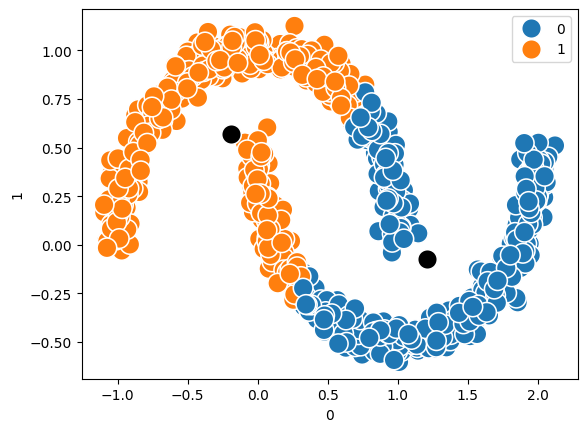

In [ ]:
# k-means 클러스터링 결과 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=200)

- 기하학적인 형태를 띄는 데이터에 k-means 클러스터링을 적용한 결과 centroid를 중심으로 가까운 거리의 데이터가 같은 클러스터로 묶였기 때문에 반달 모양으로 구분된 데이터의 특성이 잘 반영되지 못하는 것을 확인할 수 있음.

In [ ]:
df.head()

,0,1,kmeans_label
0,0.418668,-0.303678,0
1,1.054227,-0.443849,0
2,1.851153,0.081618,0
3,0.353825,0.914599,1
4,0.144472,-0.033702,1


In [ ]:
df = df.drop(columns='kmeans_label', axis=1)
df.head()

,0,1
0,0.418668,-0.303678
1,1.054227,-0.443849
2,1.851153,0.081618
3,0.353825,0.914599
4,0.144472,-0.033702


In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
eps = 0.1  # 반경
min_samples = 5  # 최소 데이터 개수

In [ ]:
# DBSCAN 모델 학습
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

In [ ]:
df.head()

,0,1,dbscan_label
0,0.418668,-0.303678,0
1,1.054227,-0.443849,0
2,1.851153,0.081618,0
3,0.353825,0.914599,1
4,0.144472,-0.033702,0


<Axes: xlabel='0', ylabel='1'>

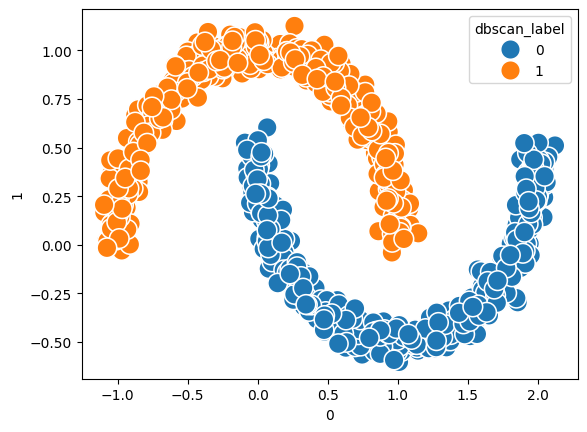

In [ ]:
# DBSCAN 결과 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=200)

## GMM (Gaussian Mixture Model)

- 가정) 데이터가 서로 다른 k개의 정규 분포에서 생성되었다고 가정
- 정규 분포란 평균을 중심으로 대칭이며 표준편차에 따라 흩어진 정도가 정해지는 분포
- GMM은 특정 데이터가 어떤 분포에 포함도리 확률이 더 큰지를 따져서 각 클러스터로 구분

In [ ]:
# 데이터셋 생성
from sklearn.datasets import make_blobs

In [ ]:
n_samples = 500  # 샘플 데이터 개수
centers = 4  # 클러스터 개수
cluster_std = 0.75  # 클러스터 내 표준편차
random_state = 13  # 샘플 데이터 고정

In [ ]:
data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

In [ ]:
# 데이터 타원형으로 만들기
tf = [[0.6, -0.6], [-0.4, 0.2]]
data_tf = data @ tf  # @ : 행렬의 곱을 의미
df = pd.DataFrame(data_tf)

<Axes: xlabel='0', ylabel='1'>

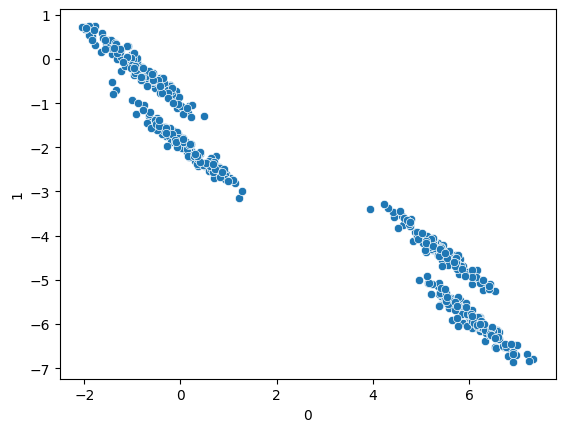

In [ ]:
# 시각화
sns.scatterplot(x=df[0], y=df[1])

In [ ]:
# k-means 클러스터링
from sklearn.cluster import KMeans

In [ ]:
# k-means 학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(df)
df['kmeans_label'] = model.predict(df)
centers = model.cluster_centers_  # 각 클러스터의 centroid

<Axes: xlabel='0', ylabel='1'>

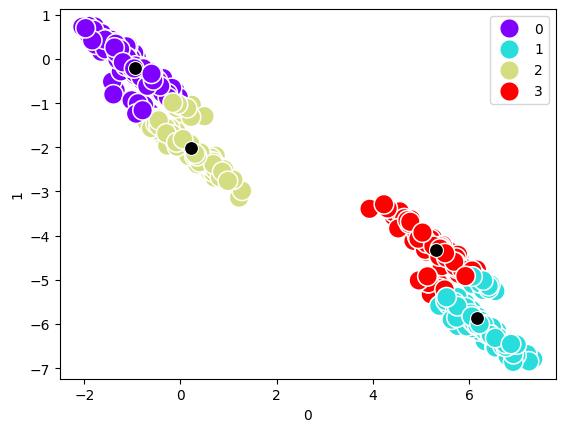

In [ ]:
# k-means 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], palette='rainbow', s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=100)

In [ ]:
df.head()

,0,1,kmeans_label
0,-0.530621,-0.650974,0
1,5.071008,-4.103361,3
2,6.328584,-6.388701,1
3,-0.286233,-0.747913,0
4,6.175041,-6.088740,1


In [ ]:
df = df.drop(columns=['kmeans_label'], axis=1)
df.head()

,0,1
0,-0.530621,-0.650974
1,5.071008,-4.103361
2,6.328584,-6.388701
3,-0.286233,-0.747913
4,6.175041,-6.088740


In [ ]:
# GMM 클러스터링
from sklearn.mixture import GaussianMixture

In [ ]:
n_components = 4  # 분포 개수
random_state = 10  # 모델 고정

In [ ]:
# GMM 모델 학습
model = GaussianMixture(n_components=n_components, random_state=random_state)
model.fit(df)
df['gmm_label'] = model.predict(df)

<Axes: xlabel='0', ylabel='1'>

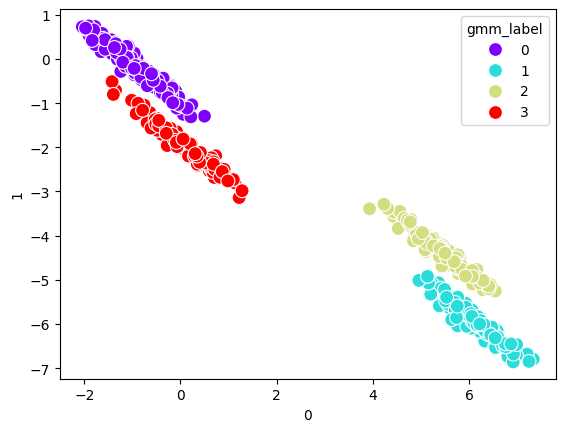

In [ ]:
# GMM 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['gmm_label'], palette='rainbow', s=100)